<a href="https://colab.research.google.com/github/vishnuvryeruva/Image-Classification---Gradient-Descent/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
class LinearRegression() :    
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0          
        self.X = X        
        self.Y = Y                  
        for i in range( self.iterations ) :              
            self.update_weights()              
        return self      
    def update_weights( self ) :             
        Y_pred = self.predict( self.X )                  
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW      
        self.b = self.b - self.learning_rate * db          
        return self      
    def predict( self, X ) :      
        return X.dot( self.W ) + self.b

Predicted values  [ 40594.69 123305.18  65031.88]
Real values       [ 37731. 122391.  57081.]
Trained W         9398.92
Trained b         26496.31


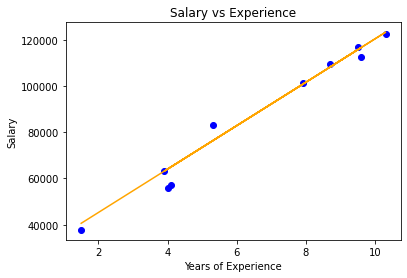

In [6]:
df = pd.read_csv( "/content/drive/MyDrive/Data/Salary_Data.csv" )
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split( 
  X, Y, test_size = 1/3, random_state = 0 )
model = LinearRegression( iterations = 1000, learning_rate = 0.01 )
model.fit( X_train, Y_train )
Y_pred = model.predict( X_test )
print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
print( "Real values      ", Y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )
plt.scatter( X_test, Y_test, color = 'blue' )
plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()